## **Classifying quality of Red wine dataset using Random Forest, Logistic Regression,SVM and Naive Bayes classifier** 

**Involves 3 steps:**

1)Data Exploratory Ananlysis

2)Feature engineering and Principle Component Analysis

3)Prediction, Model selection and Model evaluation

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import  RandomForestClassifier
from sklearn.naive_bayes import  GaussianNB
from sklearn.svm import SVC



In [2]:
df = pd.read_csv(r'C:\Users\Priti\Desktop\corpnce_data_science\kaggle proj\wine_quality\winequality-red.csv')
print(df.shape)
print(df.columns)


(1599, 12)
Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')


In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
df.info()

#no null values and no categorical variables found in our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Let's check the correlation for each column

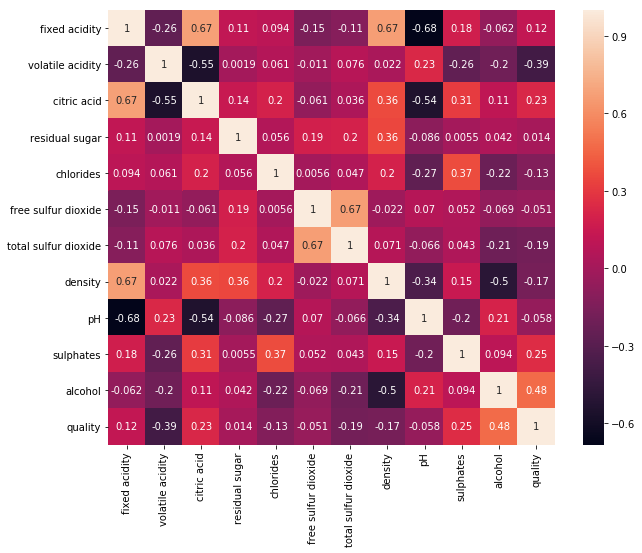

In [6]:
# df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [7]:
#label is quality

df['quality'].value_counts()


5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

We have 6 classes of output

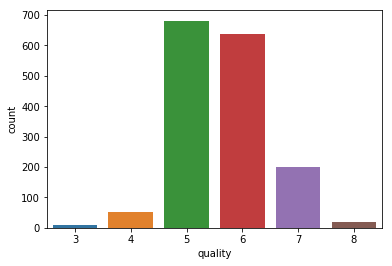

In [8]:
sns.countplot(df['quality'], data=df)

#majority of the time wine quality is between 5 and 6

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**Detect and remove outliers**

In [10]:
# values fall after 3 sigma range has been removed

df = df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]
df.shape

#around 148 outliers they fall after 3 sigma range has been removed

(1451, 12)

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,8.310062,0.522950,0.265382,2.387285,0.081425,15.104755,43.735355,0.996710,3.315934,0.642584,10.421089,5.659545
std,1.646458,0.168531,0.190934,0.862078,0.020966,9.309768,29.441284,0.001716,0.141096,0.129801,1.021588,0.781605
min,5.000000,0.120000,0.000000,1.200000,0.038000,1.000000,6.000000,0.991500,2.880000,0.330000,8.500000,4.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,21.000000,0.995600,3.220000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,36.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.630000,0.420000,2.600000,0.089000,21.000000,58.000000,0.997800,3.400000,0.720000,11.100000,6.000000
max,13.500000,1.040000,0.790000,6.700000,0.226000,47.000000,145.000000,1.002200,3.750000,1.160000,13.600000,8.000000


In [12]:
#after removing outliers we have 5 classes of target

df['quality'].value_counts()

5    617
6    586
7    185
4     47
8     16
Name: quality, dtype: int64

In [13]:
#next we shall create a new column called Review. This column will contain the values of 1,2, and 3. 
#1 - Bad
#2 - Average
#3 - Excellent
#This will be split in the following way. 
#1,2,3 --> Bad
#4,5,6,7 --> Average
#8,9,10 --> Excellent
#Create an empty list called Reviews
reviews = []
for i in df['quality']:
    if i >= 1 and i <= 3:
        reviews.append('1')
    elif i >= 4 and i <= 7:
        reviews.append('2')
    elif i >= 8 and i <= 10:
        reviews.append('3')
df['Reviews'] = reviews

In [14]:
print(df['Reviews'].value_counts())


2    1435
3      16
Name: Reviews, dtype: int64


In [15]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Reviews
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,2
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [16]:
#separate features and target

X = df.iloc[:,:11]
print(X.shape)
y=df['Reviews']
print(y.shape)

(1451, 11)
(1451,)


Now scale the data using StandardScaler

In [17]:
std = StandardScaler()
X_std =std.fit_transform(X)

#scaled features
print(X_std)

[[-0.55292997  1.05091371 -1.39039974 ...  1.37589608 -0.63645843
  -0.99985592]
 [-0.3099004   2.11933582 -1.39039974 ... -0.8219512   0.2883529
  -0.6081737 ]
 [-0.3099004   1.40705441 -1.18083057 ... -0.3965614   0.05715007
  -0.6081737 ]
 ...
 [-1.22126131 -0.07686519 -0.70929993 ...  0.73781138  0.82782618
   0.56687296]
 [-1.46429088  0.72445139 -0.76169222 ...  1.80128587  0.51955574
  -0.21649148]
 [-1.40353349 -1.26400088  1.07203802 ...  0.52511649  0.13421768
   0.56687296]]


**Perform PCA**


In [18]:
pca = PCA()
X_pca = pca.fit_transform(X_std)


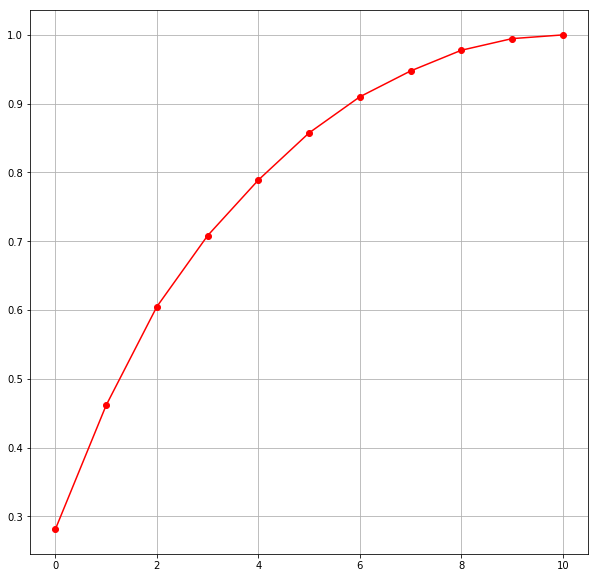

In [19]:
#plot the graph to find the principal components
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

AS per the graph, we can see that 9 principal components attribute for 95% of variance in the data. 

Let's pick the first 9 components for our prediction.

In [20]:
pca_new = PCA(n_components=9)
X_pca_new = pca_new.fit_transform(X_std)
print(X_pca_new.shape)
X_pca_new


(1451, 9)


array([[ 1.76865681, -0.94437809, -1.34670394, ..., -0.207836  ,
        -0.54495425, -0.061582  ],
       [ 0.9393236 , -2.17101044, -0.07198522, ...,  1.79901911,
         0.75294551, -0.37780532],
       [ 0.81012055, -1.31632488, -0.72682326, ...,  1.01077666,
         0.55059655,  0.01562068],
       ...,
       [ 1.50988538,  0.36187869,  1.43874077, ...,  0.22538141,
         0.07989012, -0.86868533],
       [ 2.53629085, -0.38394721,  1.30425487, ...,  0.09718239,
        -0.51141354, -0.6563685 ],
       [ 0.22785274,  1.22179113,  1.39979869, ..., -1.57813048,
         0.60118216,  0.11302947]])

In [21]:
#split the data for train and test

X_train,X_test,y_train,y_test = train_test_split(X_pca_new,y,test_size=.3,random_state=1)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1015, 9)
(436, 9)
(1015,)
(436,)


**Let's create the models**


**Fit, predict and evaluate Random forest**

In [22]:
#Fit the model 
rf = RandomForestClassifier(criterion='gini',max_depth=3,random_state=42)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
#Predict
pred_rf = rf.predict(X_test)


In [24]:
#Evaluation of the model

print('Test accuracy for Random Forest is:',metrics.accuracy_score(y_test,pred_rf)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_rf))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_rf))

Test accuracy for Random Forest is: 99.08256880733946

Confusion matrix:
 [[432   0]
 [  4   0]]

 Classification Report: 
              precision    recall  f1-score   support

          2       0.99      1.00      1.00       432
          3       0.00      0.00      0.00         4

avg / total       0.98      0.99      0.99       436



E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Fit, predict and evaluate Logistic Regression**

In [25]:
#Fit the model
log = LogisticRegression()

log.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
#predict
pred_log = log.predict(X_test)


In [27]:
#Evaluation

print('Test accuracy for Logistic Regression is:',metrics.accuracy_score(y_test,pred_log)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_log))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_log))

Test accuracy for Logistic Regression is: 99.08256880733946

Confusion matrix:
 [[432   0]
 [  4   0]]

 Classification Report: 
              precision    recall  f1-score   support

          2       0.99      1.00      1.00       432
          3       0.00      0.00      0.00         4

avg / total       0.98      0.99      0.99       436



E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Fit, predict and evaluate Naive Bayes model**

In [28]:
#Fit the model
nb = GaussianNB()

nb.fit(X_train,y_train)


GaussianNB(priors=None)

In [29]:
#predict
pred_nb = nb.predict(X_test)


In [30]:
#evaluation

print('\nTest accuracy for Naive Bbayes model is:',metrics.accuracy_score(y_test,pred_nb)*100)
print('\nConfusion matrix:\n',metrics.confusion_matrix(y_test,pred_nb))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_nb))


Test accuracy for Naive Bbayes model is: 98.85321100917432

Confusion matrix:
 [[431   1]
 [  4   0]]

 Classification Report: 
              precision    recall  f1-score   support

          2       0.99      1.00      0.99       432
          3       0.00      0.00      0.00         4

avg / total       0.98      0.99      0.99       436



**Fit, predict and evaluate using SVM**

In [31]:
#fit the model

svm = SVC()

svm.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
#predict
pred_svm = svm.predict(X_test)


In [33]:
#evaluation
print('\n Test accuracy for SVM is:',metrics.accuracy_score(y_test,pred_svm)*100)
print('\n Confusion matrix:\n',metrics.confusion_matrix(y_test,pred_svm))
print('\n Classification Report: \n',metrics.classification_report(y_test,pred_svm))


 Test accuracy for SVM is: 99.08256880733946

 Confusion matrix:
 [[432   0]
 [  4   0]]

 Classification Report: 
              precision    recall  f1-score   support

          2       0.99      1.00      1.00       432
          3       0.00      0.00      0.00         4

avg / total       0.98      0.99      0.99       436



E:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**Results and conclusion**

By adding review column and making it as our label  we are able to get better accuracy.

99.08% accuracy for Random forest classifier, logistic regression and SVM

98.85% accuracy for Naive Bayes classifier
